In [1]:
from read import read_features

In [2]:
features_files = ['1_20151124_noon_2.csv', '2_20151106_noon.csv', '3_20151024_noon.csv','4_20151105_noon.csv', '4_20151107_noon.csv',
            '5_20141108_noon.csv', '5_20151012_night.csv', '6_20151121_noon.csv','7_20151015_night.csv', '8_20151022_noon.csv', 
            '9_20151017_night.csv', '10_20151125_noon.csv', '11_20151024_night.csv', '12_20150928_noon.csv', '13_20150929_noon.csv',
            '14_20151014_night.csv','15_20151126_night.csv', '16_20151128_night.csv', '17_20150925_noon.csv', '18_20150926_noon.csv',
            '19_20151114_noon.csv', '20_20151129_night.csv', '21_20151016_noon.csv']

In [3]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

from itertools import cycle

import matplotlib
import matplotlib.pyplot as plt

In [4]:
file = './features/21_20151016_noon.csv'
X, y = read_features(file, features=[0, 1])
# X, y = read_features(file)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_minmax = scaler.fit_transform(X)

In [6]:
X_minmax.shape

(885, 34)

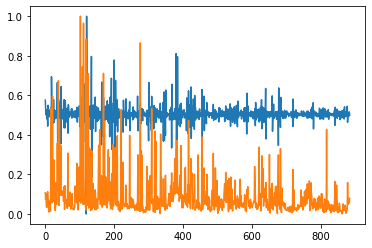

In [7]:
plt.plot(X_minmax.T[0])
plt.plot(X_minmax.T[1])

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standar = scaler.fit_transform(X)

In [26]:
af = AffinityPropagation(preference=-20, max_iter=500, affinity='euclidean', random_state=42)

af.fit(X_minmax)

cluster_centers_indices = af.cluster_centers_indices_
predictions = af.labels_
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


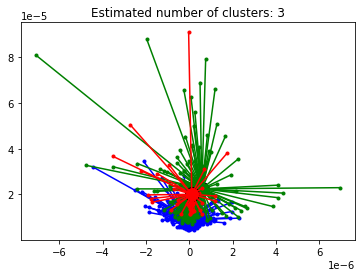

In [14]:
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = predictions == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

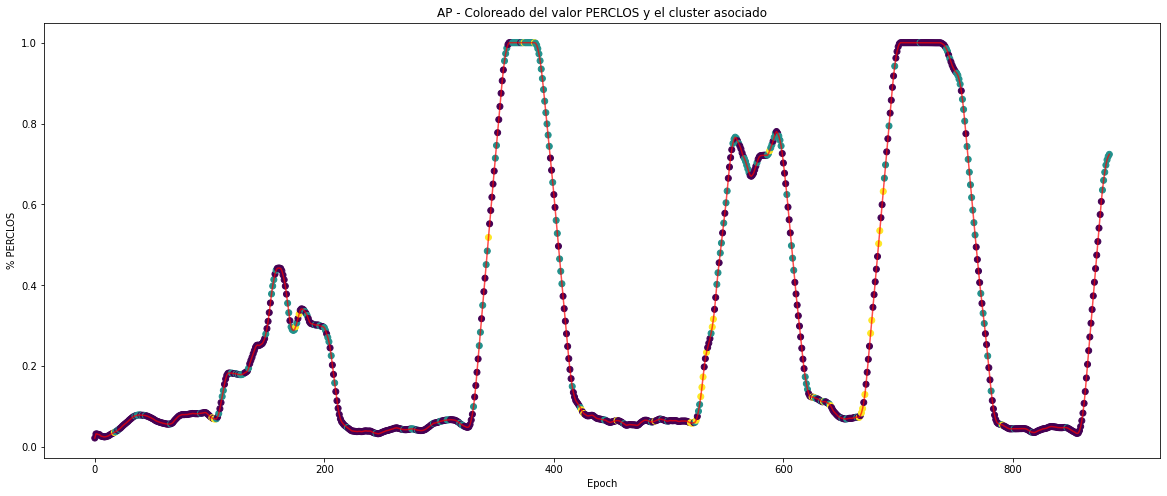

In [28]:
plt.figure(figsize=(20, 8))
plt.plot(y, color='r', alpha=0.7)
plt.scatter(range(len(predictions)), y, c=predictions)
plt.title('AP - Coloreado del valor PERCLOS y el cluster asociado')
plt.xlabel('Epoch')
plt.ylabel('% PERCLOS')
plt.show()